## 아마존 제품 리뷰 주제어 분석
---
잠재 의미 분석(Latent Semantic Analysis)을 활용한 주제어 분석 실습

### 0. 아마존 제품 리뷰 TDM 분석 결과 및 원본 파일 불러오기

In [1]:
import pandas as pd
import joblib

In [2]:
with open('amazon.pkl', 'rb') as f:
    data = joblib.load(f)
locals().update(data)

In [3]:
tdm.shape

(1000, 1000)

### 1. LSA 적용

#### 특이값 분해로 차원 축소하기

In [4]:
from sklearn.decomposition import TruncatedSVD

In [5]:
svd = TruncatedSVD(n_components=30)
pos = svd.fit_transform(tdm)
pos.shape

(1000, 30)

#### 2차원 상에 시각화

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

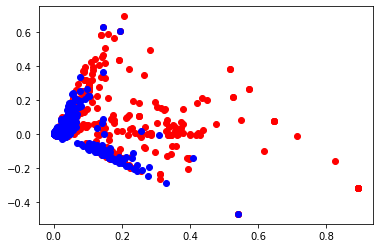

In [8]:
dim1 = 0
dim2 = 1
plt.plot(pos[sentiment == 1, dim1], pos[sentiment == 1, dim2],'ro')
plt.plot(pos[sentiment == 0, dim1], pos[sentiment == 0, dim2],'bo')
plt.show()

#### 정규화 진행

In [9]:
from sklearn.preprocessing import Normalizer

In [10]:
norm = Normalizer(copy=False)
pos2 = norm.fit_transform(pos)

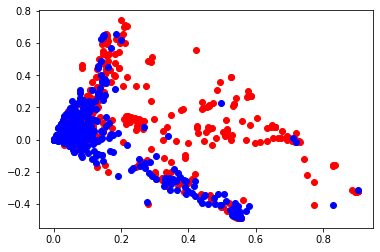

In [12]:
dim1 = 0
dim2 = 1
plt.plot(pos2[sentiment == 1, dim1], pos2[sentiment == 1, dim2],'ro')
plt.plot(pos2[sentiment == 0, dim1], pos2[sentiment == 0, dim2], 'bo')
plt.show()

In [ ]:
#from sklearn.pipeline import make_pipeline
#las = make_pipeline(svd, norm)
#las.transform(tdm)